In [30]:
# 참조
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [31]:
#파일 불러오기
df = pd.read_csv("C:/Users/tisxo/AI_class/data/seeds_dataset.txt", sep=r'\s+', header=None)

In [32]:
df

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [33]:
df.columns = [
    "Area", "Perimeter", "Compactness", "Kernel_Length",
    "Kernel_Width", "Asymmetry_Coeff", "Groove_Length", "Class"
]

In [34]:
df.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Groove_Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [35]:
# 클래스 레이블을 0부터 시작하게 조정 (0, 1, 2)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values - 1 

In [36]:
# 전처리
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [38]:
# one-hot 인코딩
y_train_cat = keras.utils.to_categorical(y_train, 3)
y_test_cat = keras.utils.to_categorical(y_test, 3)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((168, 7), (42, 7), (168,), (42,))

In [40]:
#모델 정의
inputs = Input(shape=(7,))
x = Dense(16, activation="relu")(inputs)
x = Dense(8, activation="relu")(x)
prediction = Dense(3, activation="softmax")(x)
model = Model(inputs=inputs, outputs=prediction)

In [41]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # y가 one-hot인 경우
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 291 (1.14 KB)

 Trainable params: 291 (1.14 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# 모델 학습
model_history = model.fit(
    x = X_train,
    y = y_train_cat,  # 원-핫 인코딩한 레이블
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test_cat)
)

# 예측 확률
y_pred = model.predict(X_test)

# 클래스 인덱스로 변환 (0, 1, 2)
y_test_class = np.argmax(y_test_cat, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.3721 - loss: 1.0922 - val_accuracy: 0.3333 - val_loss: 1.0587
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3457 - loss: 1.0649 - val_accuracy: 0.3333 - val_loss: 1.0231
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3097 - loss: 1.0341 - val_accuracy: 0.3571 - val_loss: 0.9871
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3345 - loss: 0.9830 - val_accuracy: 0.3810 - val_loss: 0.9541
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3606 - loss: 0.9216 - val_accuracy: 0.3810 - val_loss: 0.9239
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3648 - loss: 0.9119 - val_accuracy: 0.4762 - val_loss: 0.8965
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4577 - loss: 0.8606 - val_accuracy: 0.5000 - val_loss: 0.8715
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4634 - loss: 0.8198 - val_accuracy: 0.5952 - val_loss: 0.8509


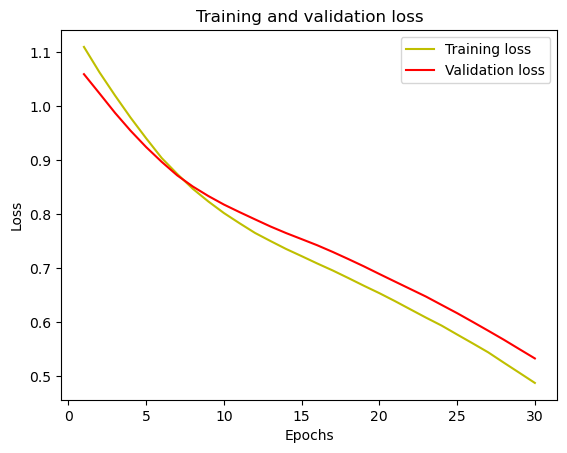

In [44]:
# 손실 시각화
loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

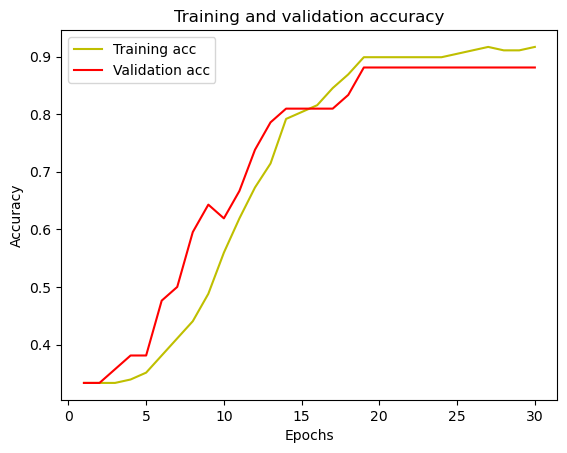

In [45]:
#정확도 시각화
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
#혼동행렬
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        14
           1       0.82      1.00      0.90        14
           2       0.88      1.00      0.93        14

    accuracy                           0.88        42
   macro avg       0.90      0.88      0.87        42
weighted avg       0.90      0.88      0.87        42

[[ 9  3  2]
 [ 0 14  0]
 [ 0  0 14]]
